In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# las 5 partes del dataframe:
part1 = pd.read_csv('Data/dataset_part1.csv')
part2 = pd.read_csv('Data/dataset_part2.csv')
part3 = pd.read_csv('Data/dataset_part3.csv')
part4 = pd.read_csv('Data/dataset_part4.csv')
part5 = pd.read_csv('Data/dataset_part5.csv')

# Une las 5 partes en un solo dataframe
full_df = pd.concat([part1, part2, part3, part4, part5], ignore_index=True)

sample_total_data = full_df.sample(n=150000, random_state=42)
sample_total_data.head()

# Guardado de la muestra
sample_total_data.to_csv('sampled_dataset.csv', index=False)

# Lee el dataframe completo
print(sample_total_data.head())  # Muestra las primeras filas del dataframe
print(sample_total_data.info())  # Muestra información sobre el dataframe
print(sample_total_data.describe())  # Muestra estadísticas descriptivas del dataframe

C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_26804\2431872290.py:8: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  part3 = pd.read_csv('Data/dataset_part3.csv')
C:\Users\Ortoactiva\AppData\Local\Temp\ipykernel_26804\2431872290.py:10: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  part5 = pd.read_csv('Data/dataset_part5.csv')


              id    spkid           full_name       pdes name prefix neo pha  \
323650  a0323651  2323651  323651 (2005 BR20)     323651  NaN    NaN   N   N   
571724  bK04C47Q  3242421         (2004 CQ47)  2004 CQ47  NaN    NaN   N   N   
395983  a0395984  2395984  395984 (2013 BV32)     395984  NaN    NaN   N   N   
235862  a0235863  2235863  235863 (2005 AY53)     235863  NaN    NaN   N   N   
651830  bK09B35Q  3445579         (2009 BQ35)  2009 BQ35  NaN    NaN   N   N   

           H  diameter  ...   sigma_i  sigma_om   sigma_w  sigma_ma  \
323650  18.2       NaN  ...  0.000005  0.000134  0.000138  0.000034   
571724  17.7       NaN  ...  0.000006  0.000062  0.000075  0.000047   
395983  17.4       NaN  ...  0.000009  0.000113  0.000119  0.000041   
235862  15.1     6.539  ...  0.000006  0.000034  0.000041  0.000029   
651830  17.3       NaN  ...  0.000009  0.000081  0.000114  0.000069   

            sigma_ad       sigma_n  sigma_tp  sigma_per  class      rms  
323650  1.785700e-

In [3]:
# Exploración y datos:

print("Dimensión del dataframe:", sample_total_data.shape)
print("Información del dataframe:")
print(sample_total_data.info())
print("Descripción del dataframe:")
print(sample_total_data.describe())

Dimensión del dataframe: (150000, 45)
Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 323650 to 867645
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              150000 non-null  object 
 1   spkid           150000 non-null  int64  
 2   full_name       150000 non-null  object 
 3   pdes            150000 non-null  object 
 4   name            3466 non-null    object 
 5   prefix          6 non-null       object 
 6   neo             149999 non-null  object 
 7   pha             146825 non-null  object 
 8   H               148974 non-null  float64
 9   diameter        21312 non-null   float64
 10  albedo          21147 non-null   float64
 11  diameter_sigma  21283 non-null   float64
 12  orbit_id        150000 non-null  object 
 13  epoch           150000 non-null  float64
 14  epoch_mjd       150000 non-null  int64  
 15  epoch_cal       150000 non-null  floa

Análisis de info()





In [4]:

# Variables numéricas
numeric_cols = sample_total_data.select_dtypes(include=[int, float])
print("Variables numéricas:")
print(numeric_cols.columns)

# Variables categóricas
categorical_cols = sample_total_data.select_dtypes(include=[object])
print("\nVariables categóricas:")
print(categorical_cols.columns)

Variables numéricas:
Index(['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch',
       'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms'],
      dtype='object')

Variables categóricas:
Index(['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id',
       'equinox', 'class'],
      dtype='object')


In [5]:
# elimanamos los duplicados:
sample_total_data.drop_duplicates(inplace=True)

# Confirmar que los duplicados han sido eliminados
print("Dataframe después de eliminar duplicados:")
print(sample_total_data.info())  # Muestra la información del dataframe para verificar el número de filas después de eliminar duplicados


Dataframe después de eliminar duplicados:
<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 323650 to 867645
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              150000 non-null  object 
 1   spkid           150000 non-null  int64  
 2   full_name       150000 non-null  object 
 3   pdes            150000 non-null  object 
 4   name            3466 non-null    object 
 5   prefix          6 non-null       object 
 6   neo             149999 non-null  object 
 7   pha             146825 non-null  object 
 8   H               148974 non-null  float64
 9   diameter        21312 non-null   float64
 10  albedo          21147 non-null   float64
 11  diameter_sigma  21283 non-null   float64
 12  orbit_id        150000 non-null  object 
 13  epoch           150000 non-null  float64
 14  epoch_mjd       150000 non-null  int64  
 15  epoch_cal       150000 non-null  float64
 16  equinox       

In [6]:
#eliminar informacion irrelevante:

# la informacion irrelevante es: "id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'

sample_total_data.drop(["id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'], axis = 1, inplace = True)
sample_total_data.head()

# Confirmar que las columnas han sido eliminadas
print("Dataframe después de eliminar columnas irrelevantes:")
print(sample_total_data.head())  # Muestra las primeras filas del dataframe para verificar
print(sample_total_data.info())  # Muestra la información del dataframe para verificar las columnas restantes



Dataframe después de eliminar columnas irrelevantes:
       neo pha     H  diameter  albedo  diameter_sigma      epoch  epoch_mjd  \
323650   N   N  18.2       NaN     NaN             NaN  2459000.5      59000   
571724   N   N  17.7       NaN     NaN             NaN  2459000.5      59000   
395983   N   N  17.4       NaN     NaN             NaN  2459000.5      59000   
235862   N   N  15.1     6.539   0.045           0.282  2459000.5      59000   
651830   N   N  17.3       NaN     NaN             NaN  2459000.5      59000   

         epoch_cal equinox  ...          ma        ad         n            tp  \
323650  20200531.0   J2000  ...  179.176894  2.585274  0.288395  2.458379e+06   
571724  20200531.0   J2000  ...    3.569723  3.205039  0.238890  2.458986e+06   
395983  20200531.0   J2000  ...  308.915996  3.021245  0.220342  2.459232e+06   
235862  20200531.0   J2000  ...  226.465057  3.658708  0.179434  2.459745e+06   
651830  20200531.0   J2000  ...  189.338944  3.253162  0.2156

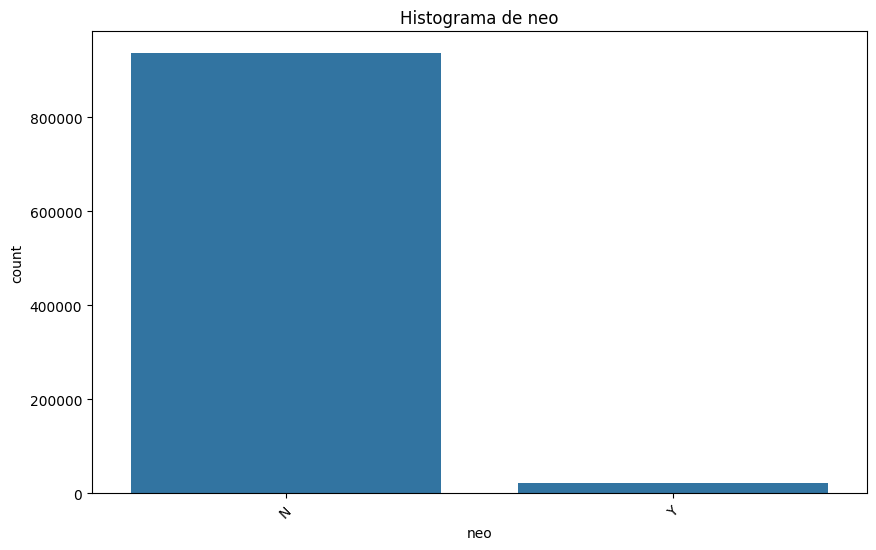

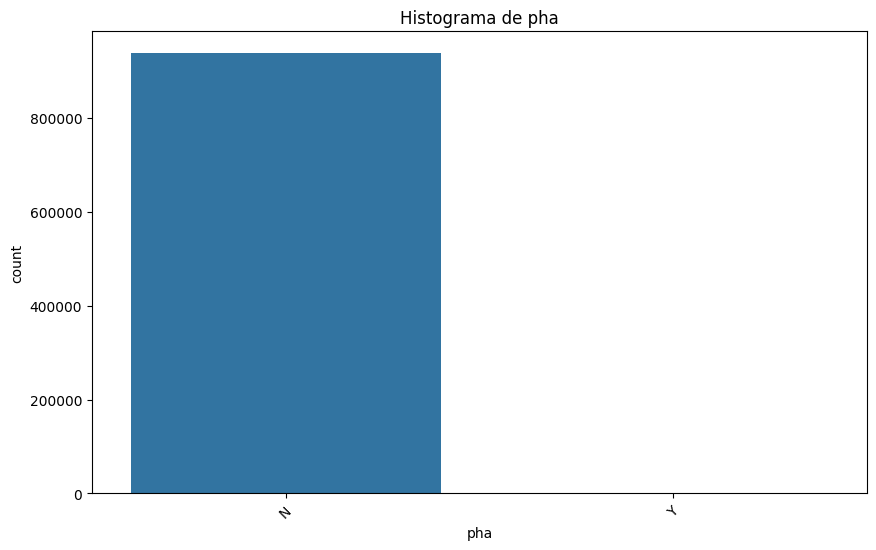

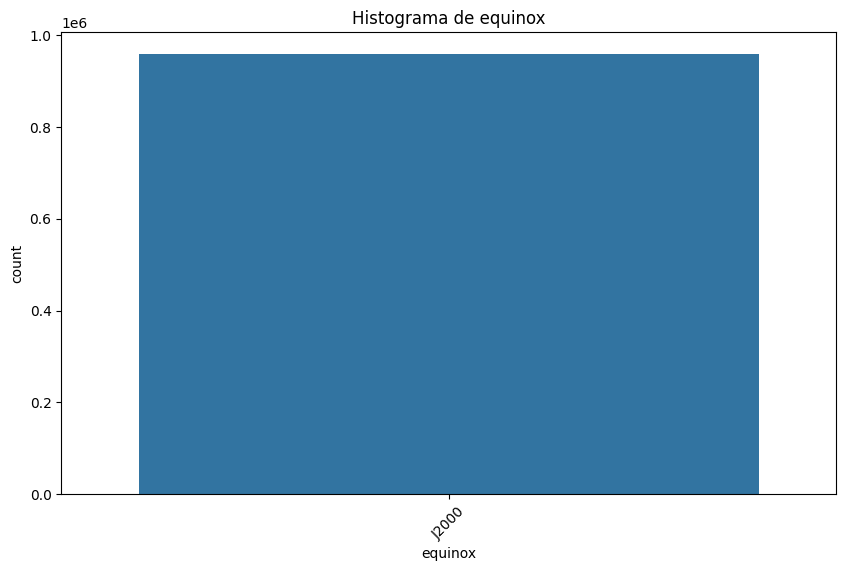

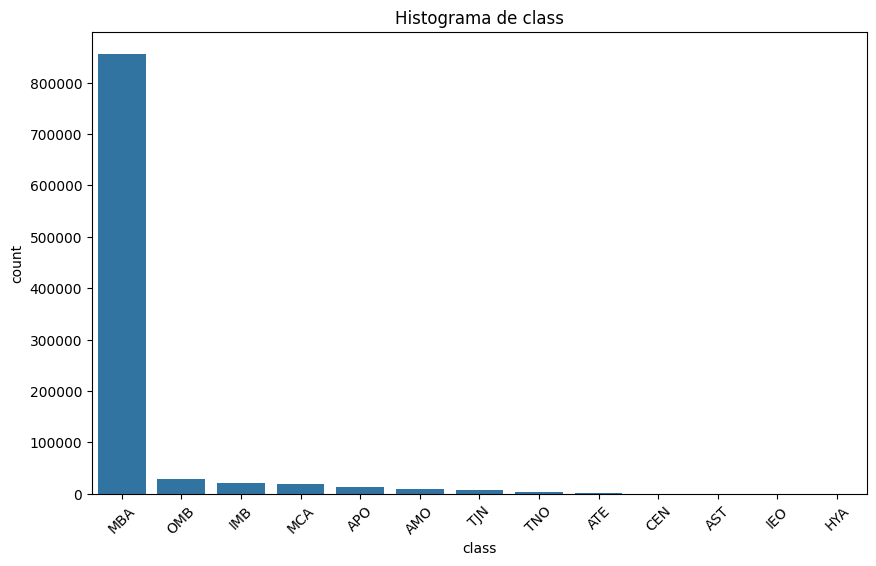

In [7]:

# Análisis de variables categóricas con histogramas
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas
categorical_cols = sample_total_data.select_dtypes(include=[object]).columns

# Crear un histograma para cada variable categórica
for col in categorical_cols:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=full_df, x=col, order=full_df[col].value_counts().index)
    plt.title(f'Histograma de {col}')
    plt.xticks(rotation=45)
    plt.show()
    
    # guardado nuevo
    

se guardara o no?

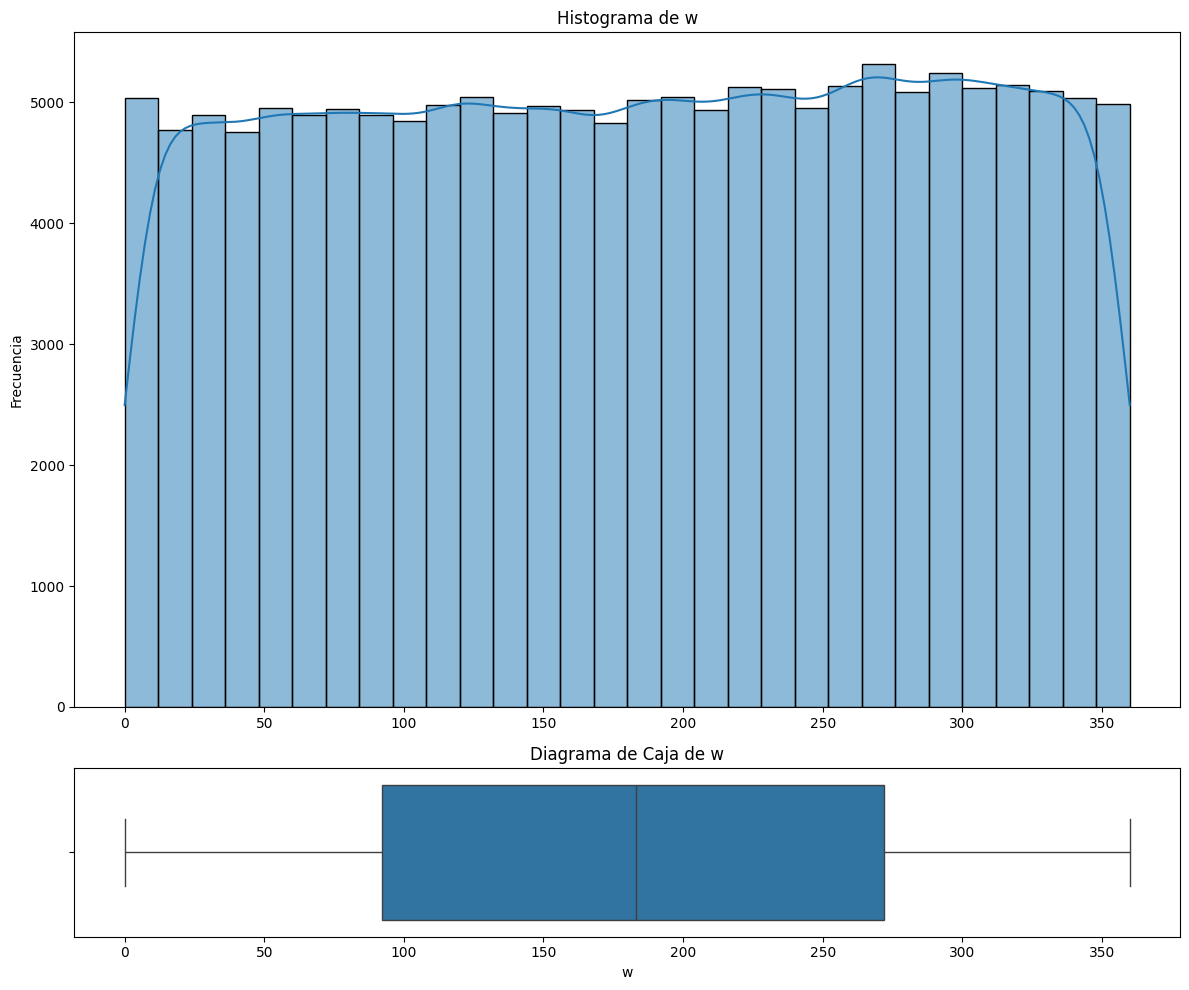

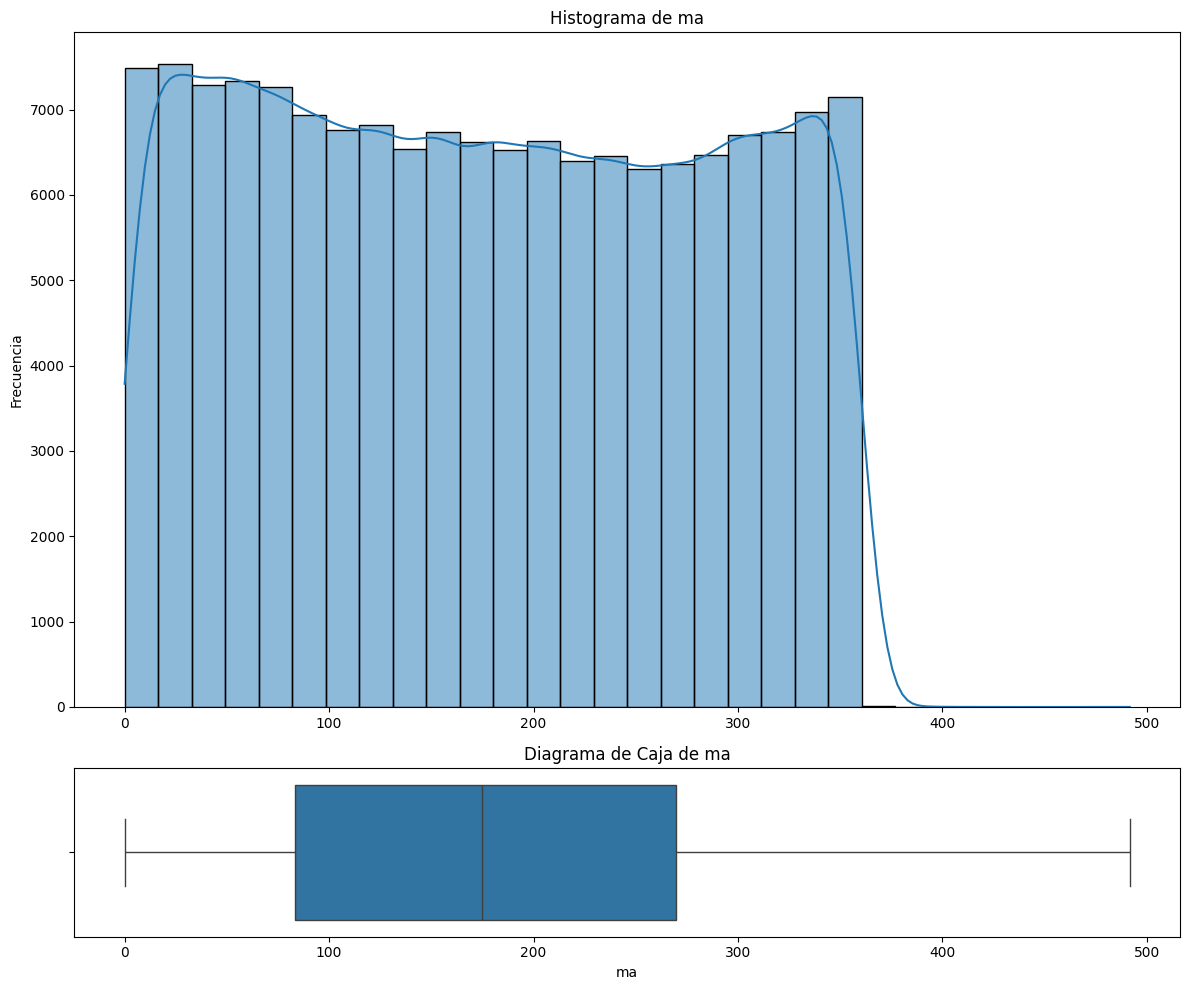

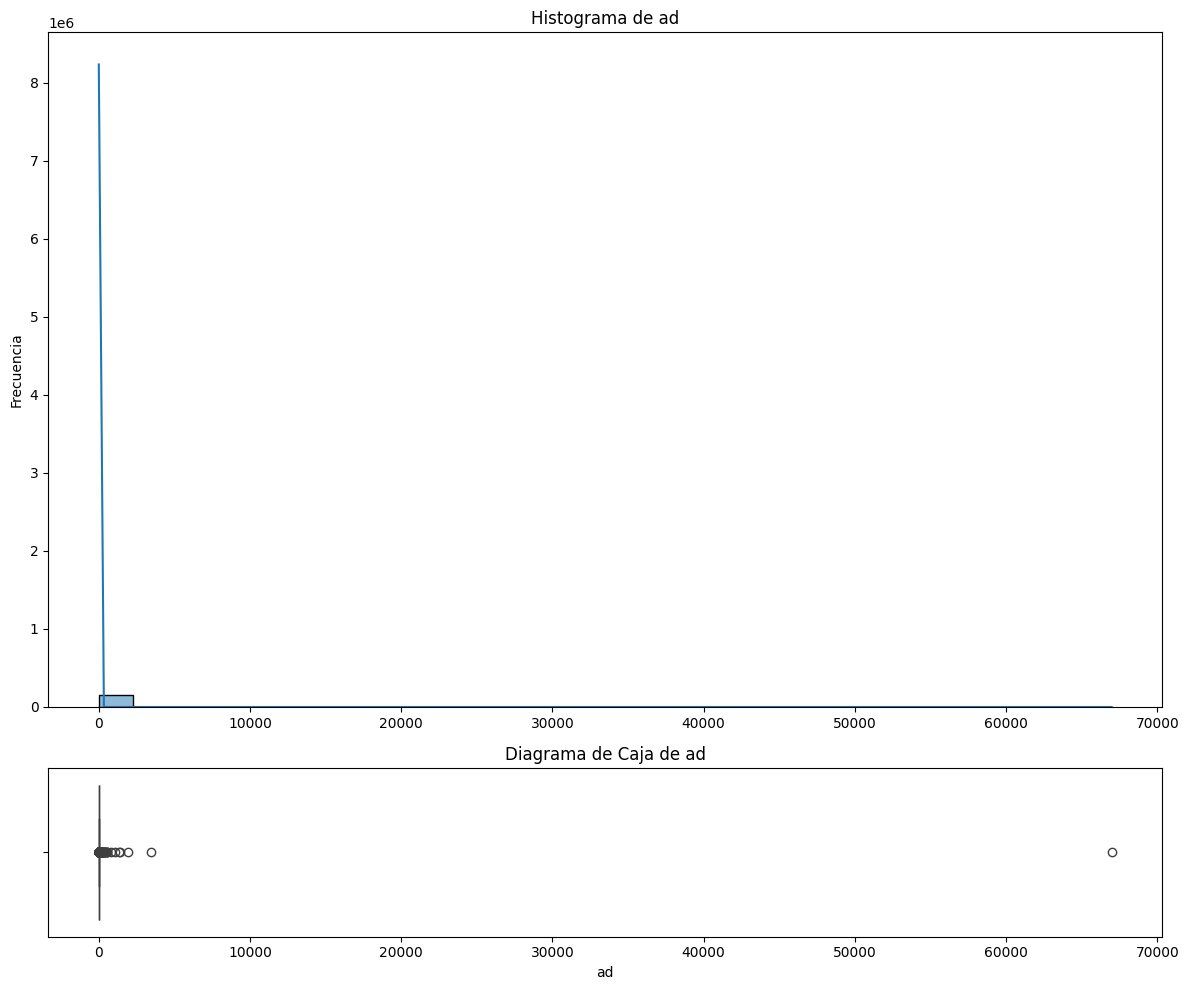

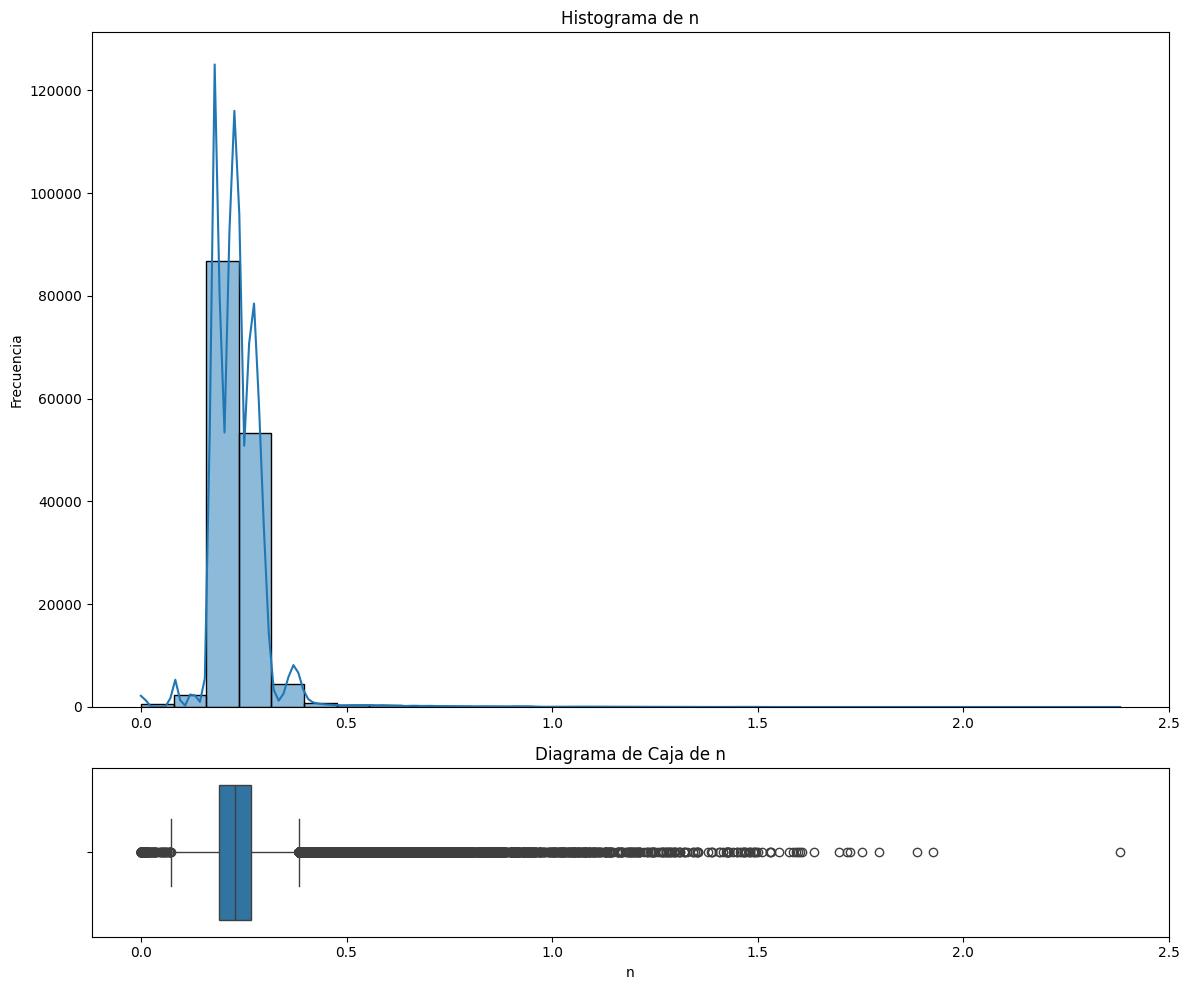

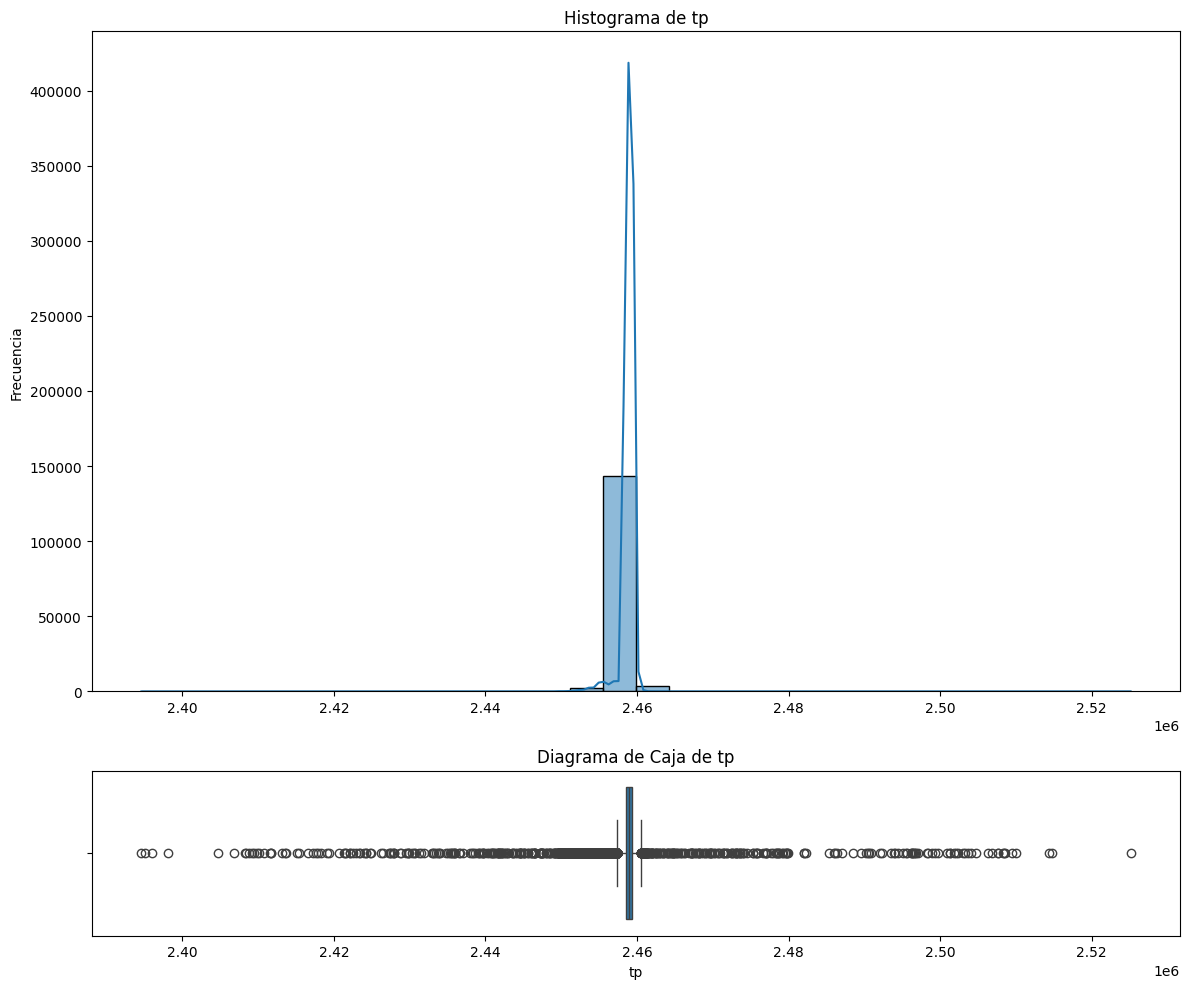

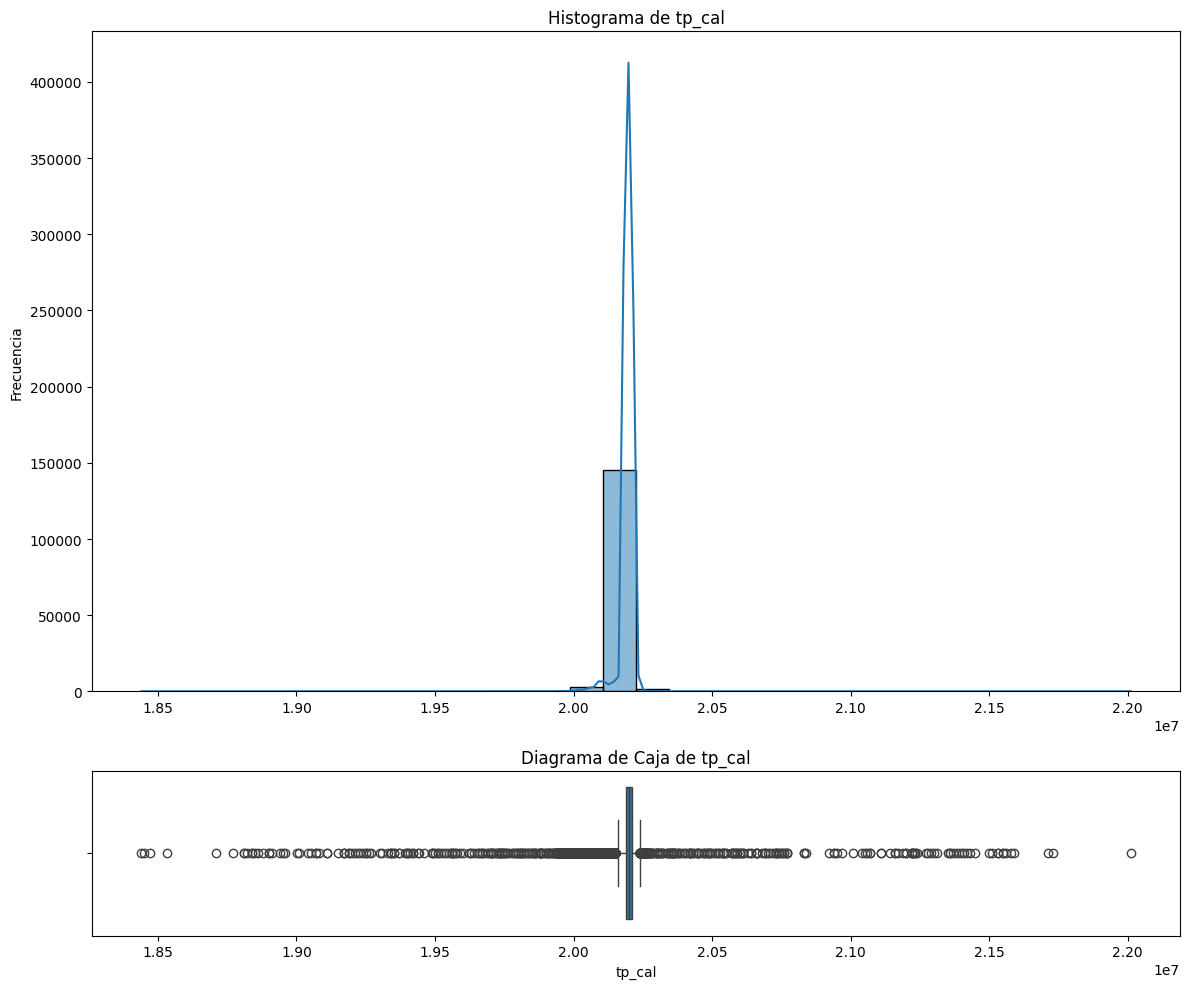

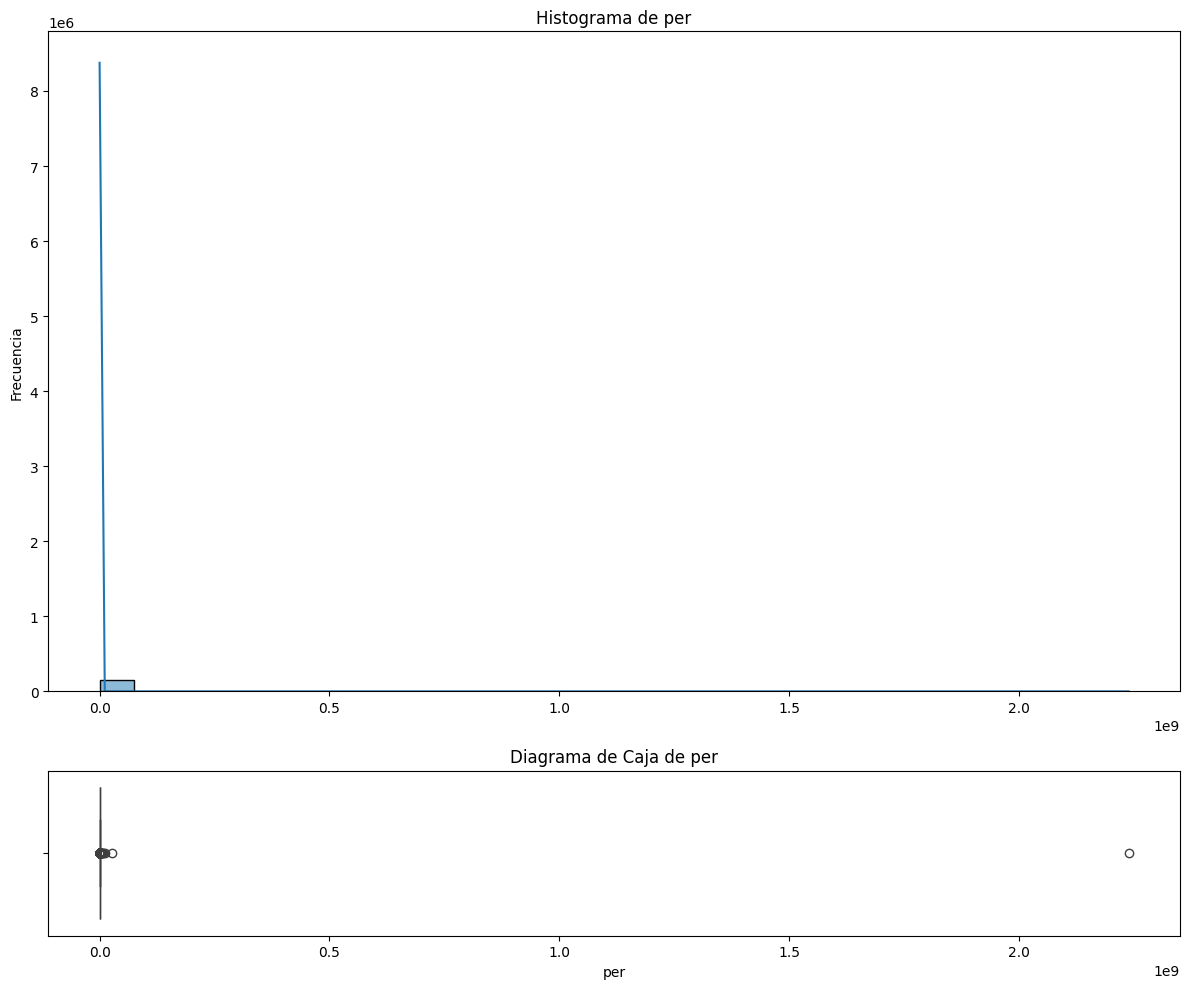

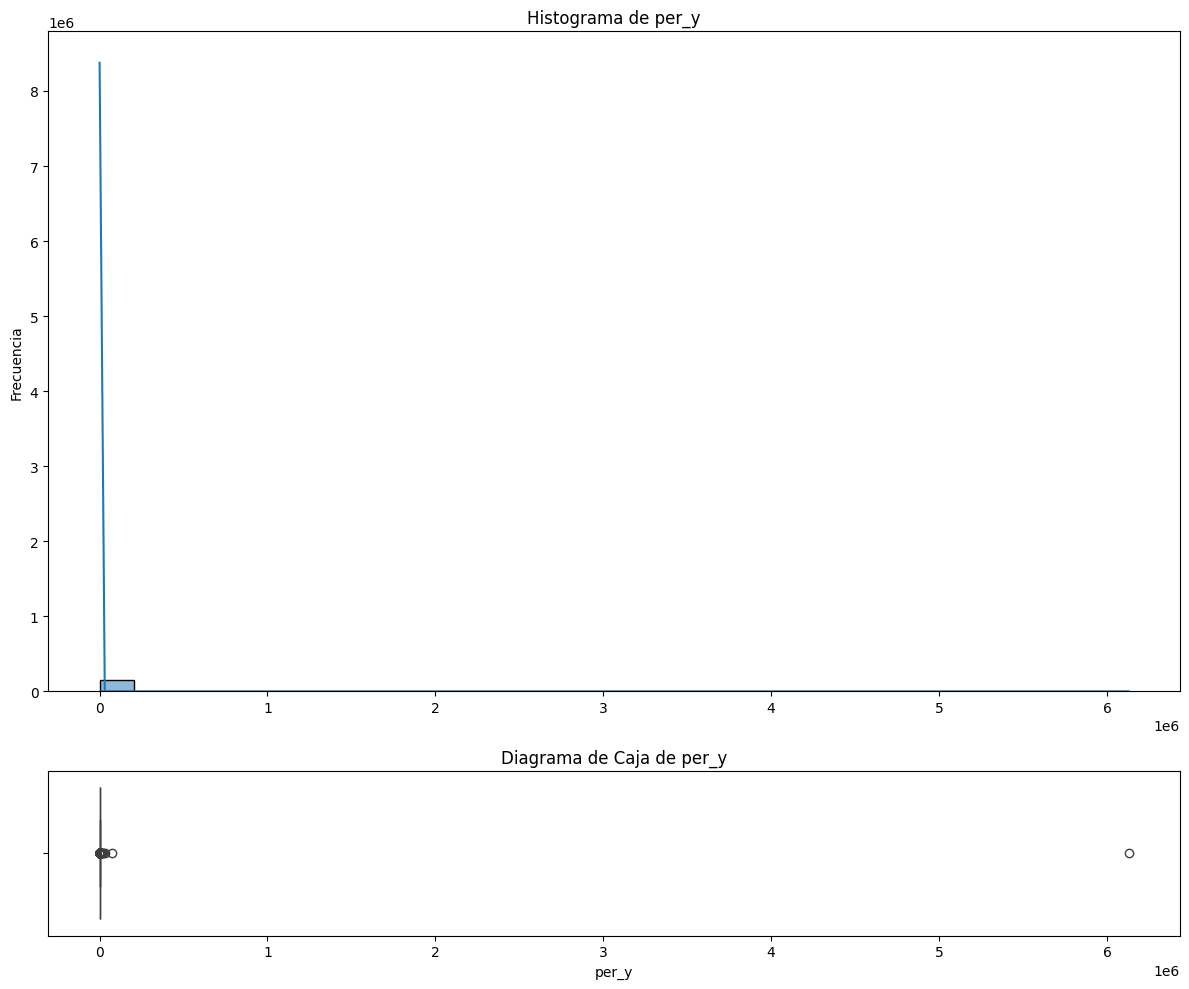

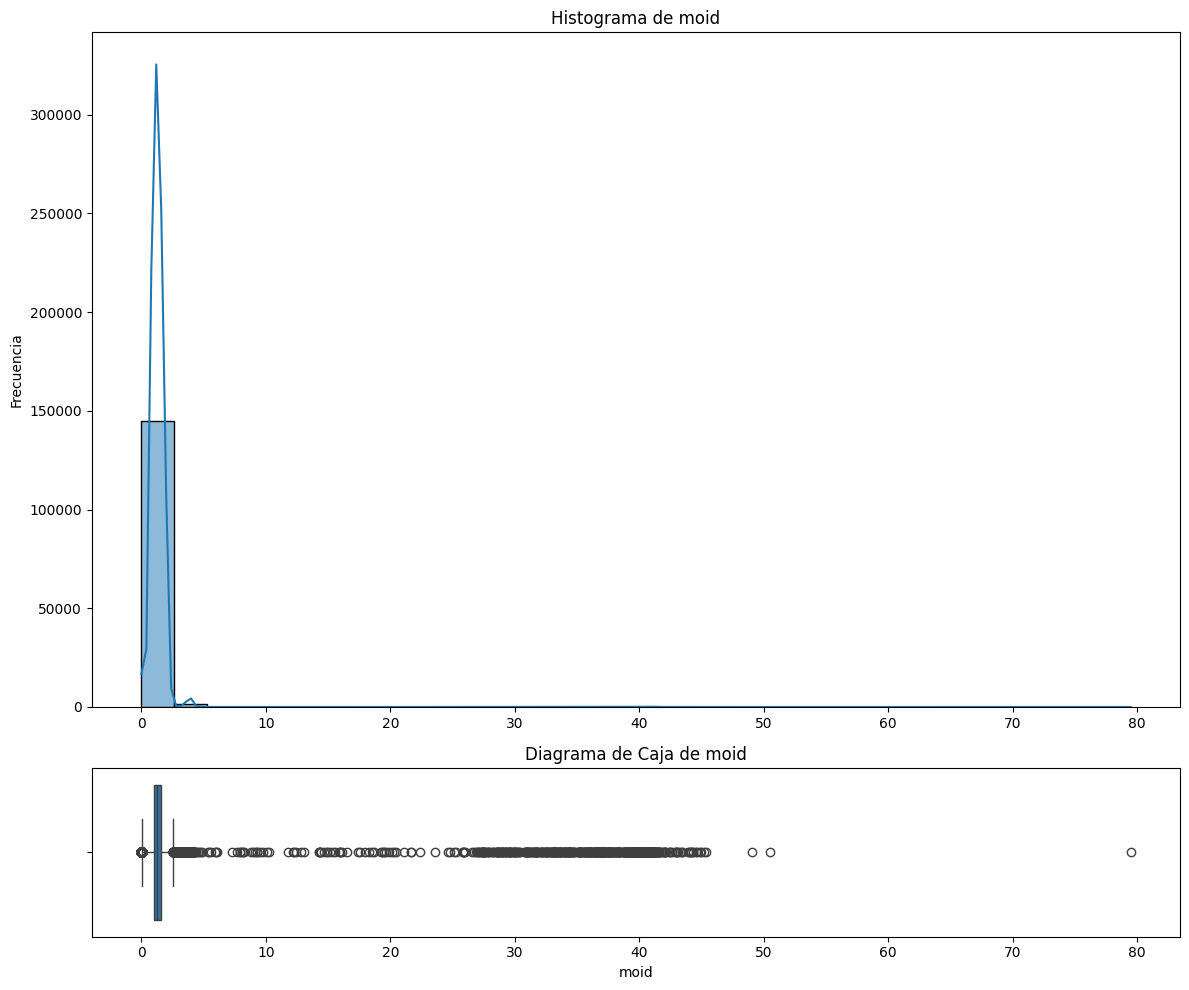

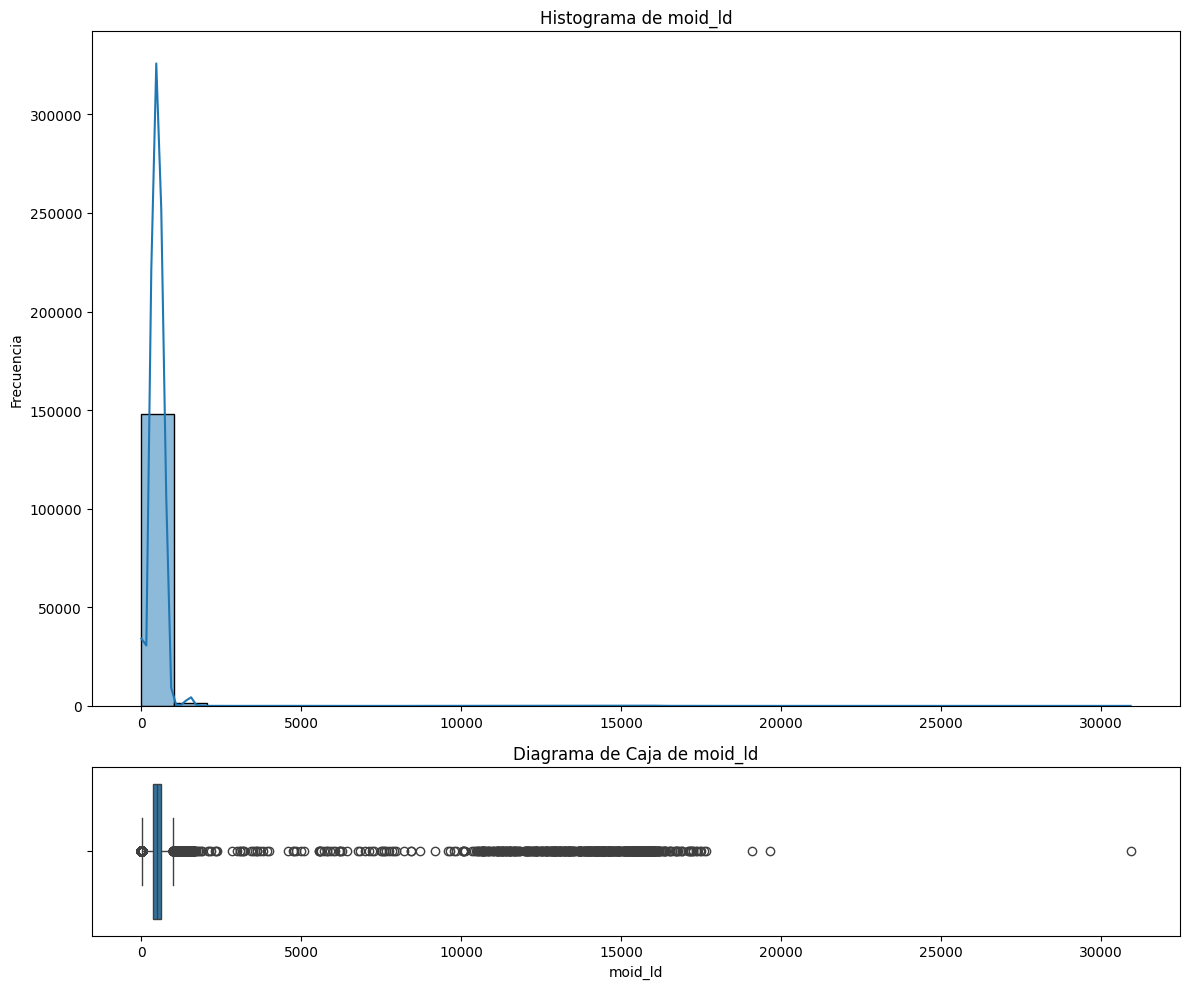

In [10]:
# Análisis de las variables específicas con histogramas y diagramas de caja
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables específicas
specific_vars = ['w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld']

# Crear un histograma y un diagrama de caja para cada variable específica
for col in specific_vars:
    fig, ax = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [4, 1]})
    
    # Histograma
    sns.histplot(data=sample_total_data, x=col, kde=True, bins=30, ax=ax[0])
    ax[0].set_title(f'Histograma de {col}')
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Frecuencia')
    
    # Diagrama de caja
    sns.boxplot(data=sample_total_data, x=col, ax=ax[1])
    ax[1].set_title(f'Diagrama de Caja de {col}')
    ax[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()

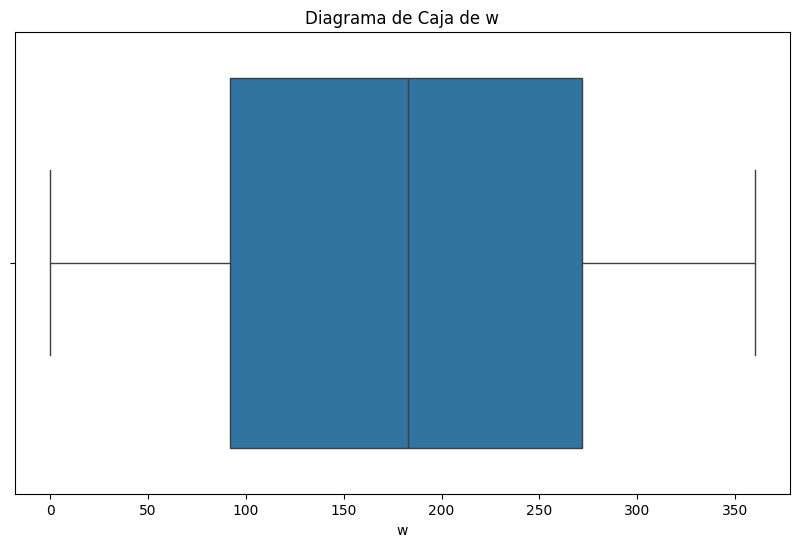

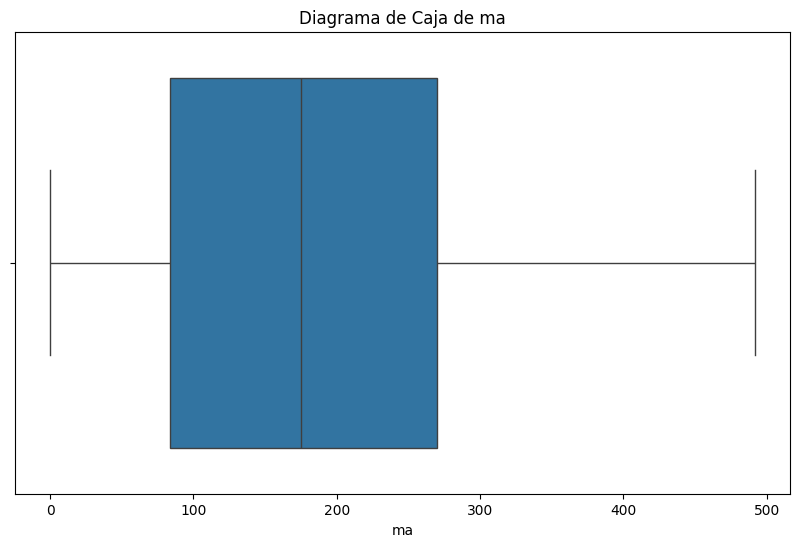

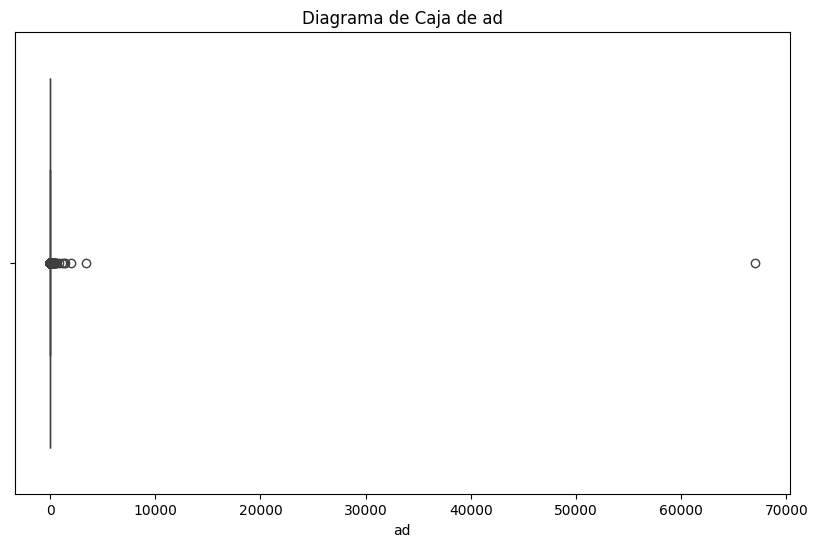

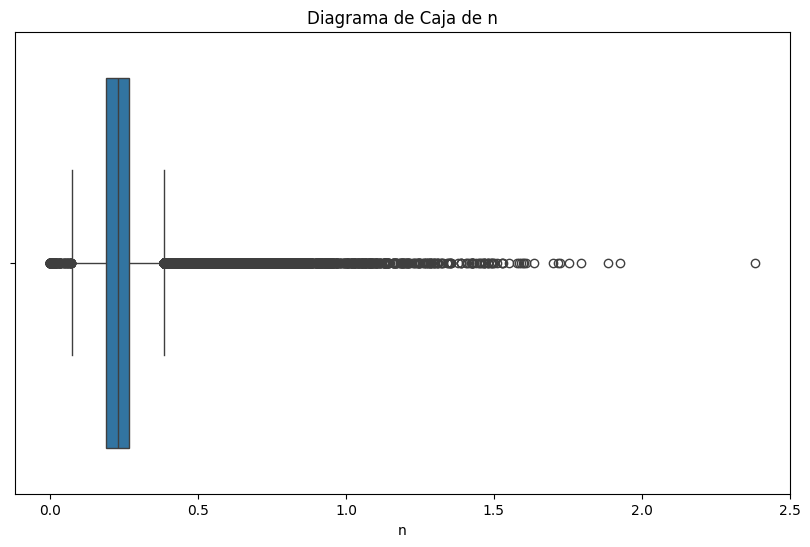

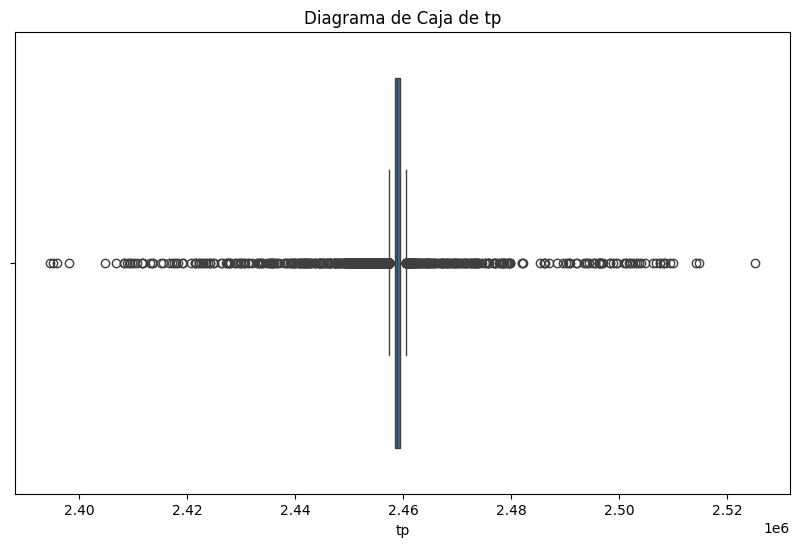

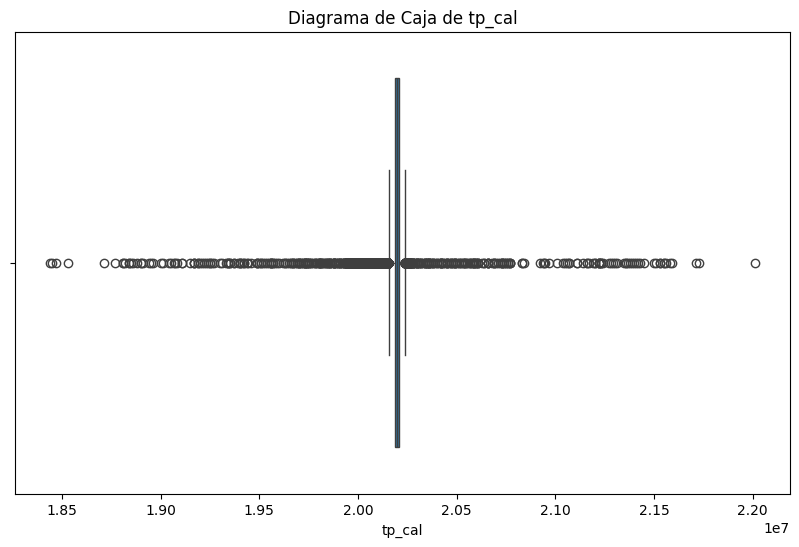

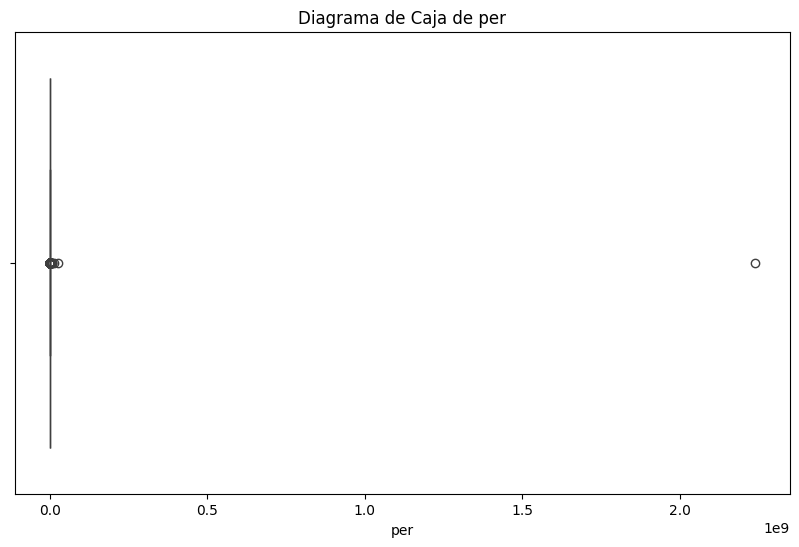

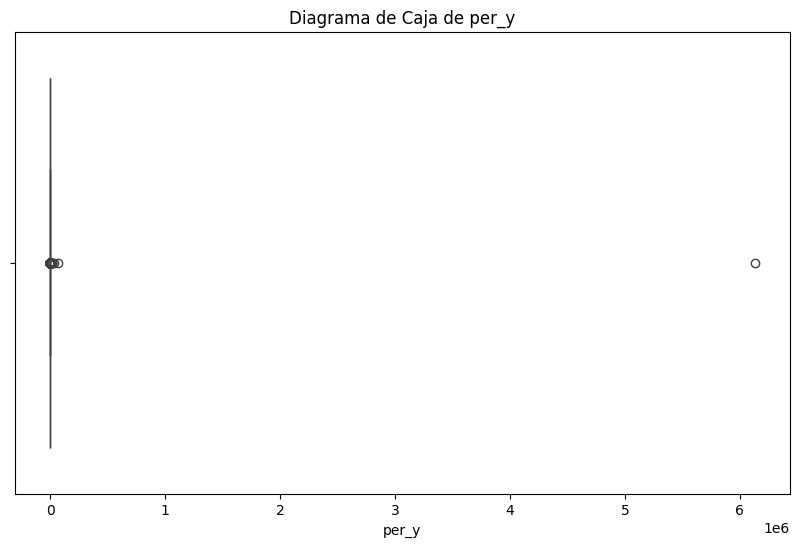

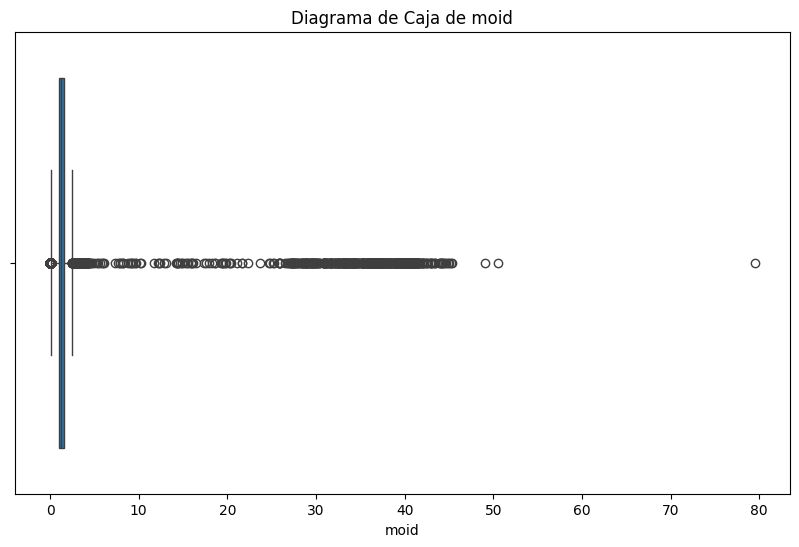

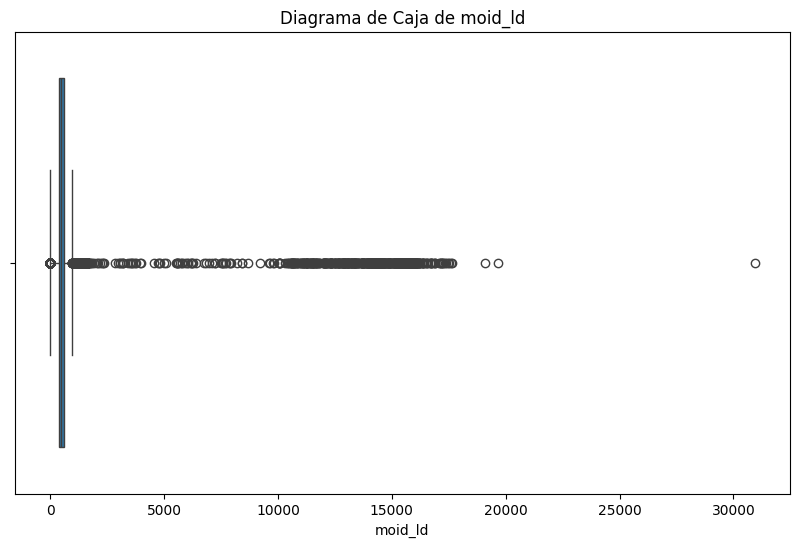